In [1]:
!pip install  swig
!pip install "mo-gymnasium[all]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.1/421.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.2/208.2 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

GIF saved as moredgathering.gif


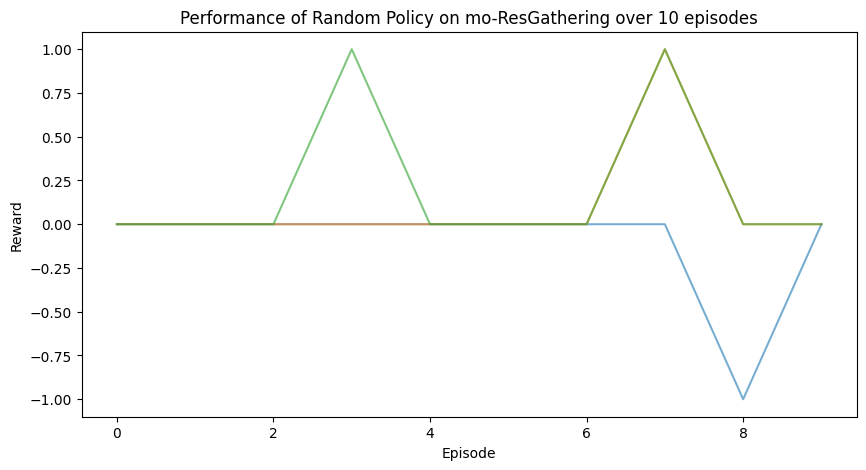

In [3]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import imageio
import matplotlib.pyplot as plt

# Initialize the MO-ResourceGathering environment
env = mo_gym.make(
    "resource-gathering-v0",
    render_mode = "rgb_array"
)

def render_to_image(env):
    """Convert the text-based rendering to an image."""
    img = env.render()
    return img

def evaluate_and_save_gif(num_episodes=100, filename="moresgathering.gif"):
    """
    Evaluate a random policy, save the rendered outputs to a GIF, and return aggregated rewards.
    """
    frames = []
    rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        done = False

        # Add initial state to frames
        frames.append(render_to_image(env))

        while not done:
            # Choose a random action
            action = env.action_space.sample()

            # Take a step in the environment
            next_state, reward, done, _, info = env.step(action)
            episode_reward += reward

            # Add the new state to frames
            frames.append(render_to_image(env))

        rewards.append(episode_reward)

    # Save frames as a gif
    imageio.mimsave(filename, [np.array(f) for f in frames], duration=0.5)
    print(f"GIF saved as {filename}")

    return rewards

# Evaluate the random policy, save the GIF, and retrieve rewards
num_episodes = 10
rewards = evaluate_and_save_gif(num_episodes=num_episodes, filename="moredgathering.gif")

# Plotting the aggregated rewards
plt.figure(figsize=(10, 5))
plt.plot(np.arange(num_episodes), rewards, alpha=0.6)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Performance of Random Policy on mo-ResGathering over {} episodes'.format(num_episodes))
plt.show()


